In [40]:
#pip install pandas numpy matplotlib seaborn plotly scikit-learn imbalanced-learn sklearn

**System Deteksi Penipuan Kartu Kredit (Credit Card Fraud)**
===
---

System Deteksi Penipuan Kartu Kredit (Credit Card Fraud) dengan imbalance dataset


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import imblearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score




%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

## **Data Preparation**

### **Input Datasets**
---


 **Tentang Dataset**

 **Konteks**

Penting bagi perusahaan kartu kredit untuk dapat mengenali transaksi kartu kredit yang mencurigakan agar pelanggan tidak dikenakan biaya untuk barang yang tidak mereka beli.

 **Content**

Dataset ini berisi transaksi yang dilakukan dengan kartu kredit pada September 2013 oleh pemegang kartu kredit di Eropa.
Dataset ini menampilkan transaksi yang terjadi dalam dua hari, di mana terdapat 492 transaksi Fraud(penipuan) dari total 284.807 transaksi. Dataset ini sangat tidak seimbang, kelas positif (transaksi Fraud(penipuan)) hanya menyumbang 0,172% dari total transaksi.

Data ini hanya berisi variabel input numerik yang merupakan hasil transformasi PCA. Sayangnya, karena masalah kerahasiaan, kami tidak dapat menyediakan fitur asli dan informasi latar belakang lebih lanjut tentang data. Fitur V1, V2, … V28 adalah komponen utama yang diperoleh dengan PCA, fitur-fitur yang tidak ditransformasi dengan PCA adalah 'Time' dan 'Amount'. Fitur 'Time' berisi detik yang berlalu antara setiap transaksi dan transaksi pertama dalam dataset. Fitur 'Amount' adalah jumlah transaksi, fitur ini dapat digunakan untuk pembelajaran sensitif biaya yang bergantung pada contoh. Fitur 'Class' adalah variabel respons dan bernilai 1 jika terjadi Fraud(penipuan) dan 0 jika tidak.

**link dataset :** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud



In [42]:
raw_data = pd.read_csv('creditcard.csv')
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


### **Metadata dataset**


In [43]:
raw_data.shape

(284807, 31)

In [44]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

memastikan tidak ada data yang memiliki value null 

In [45]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

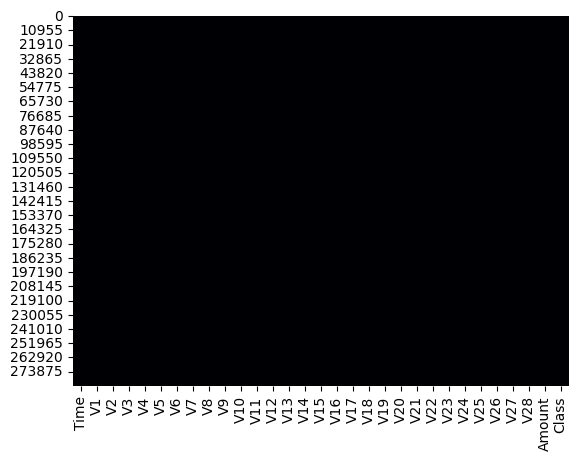

In [46]:
sns.heatmap(raw_data.isnull(),cmap = 'magma',cbar = False)

raw_data.isnull().max()

menurut hasil pengecekan `isnull` dapat dipastikan tidak ada data yang memiliki value null

pengecekan `isnull` bisa dilakukan dengan 2 cara yaitu dengan heatmap atau langsung memerikasa menggunakan dataframe

In [47]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


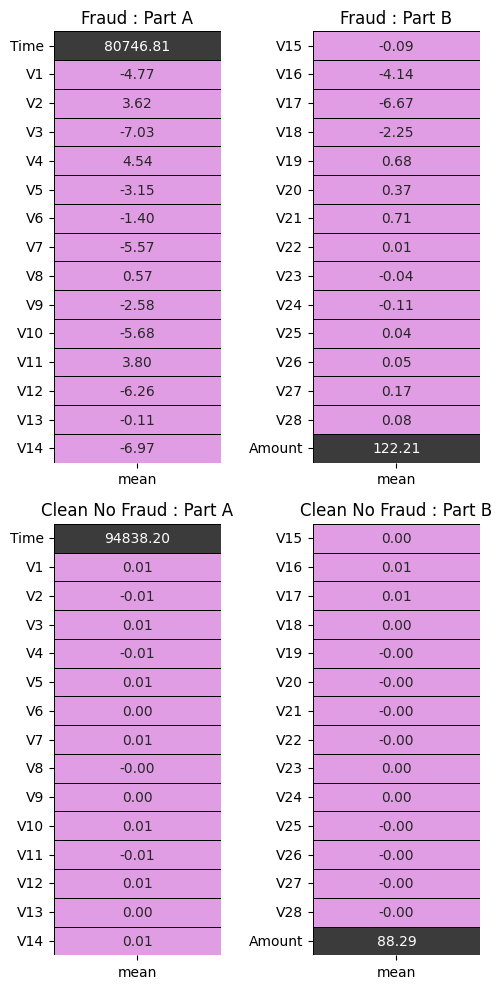

In [48]:
# Fraud vs No Fraud
fraud   = raw_data[raw_data['Class'] == 1].describe().T
nofraud = raw_data[raw_data['Class'] == 0].describe().T

colors = ["#e19de4", '#3B3B3C']

# 2×2 subplots 
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,10))

# Heatmap 
sns.heatmap(
    fraud[["mean"]].iloc[:15, :], annot=True, cmap=colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f', ax=ax[0, 0])
ax[0, 0].set_title('Fraud : Part A')

sns.heatmap(
    fraud[["mean"]].iloc[15:30, :],annot=True, cmap=colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f', ax=ax[0, 1])
ax[0, 1].set_title('Fraud : Part B')

sns.heatmap(
    nofraud[["mean"]].iloc[:15, :],annot=True, cmap=colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f', ax=ax[1, 0])
ax[1, 0].set_title('Clean No Fraud : Part A')

sns.heatmap(
    nofraud[["mean"]].iloc[15:30, :],annot=True, cmap=colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f', ax=ax[1, 1])
ax[1, 1].set_title('Clean No Fraud : Part B')

fig.tight_layout(w_pad=2)
plt.show()

**Mean** Value merupakan fitur untuk Fraud dan Clean No Fraud

Untuk **Clean No Fraud**, Mean Value **V1 hingga V28** hampir **0** untuk semua kasus. Mean jumlah transaksi, 88.29, lebih kecil daripada  mean jumlah transaksi **Fraud(penipuan)** , 122.21



### **Visualisasi Data**

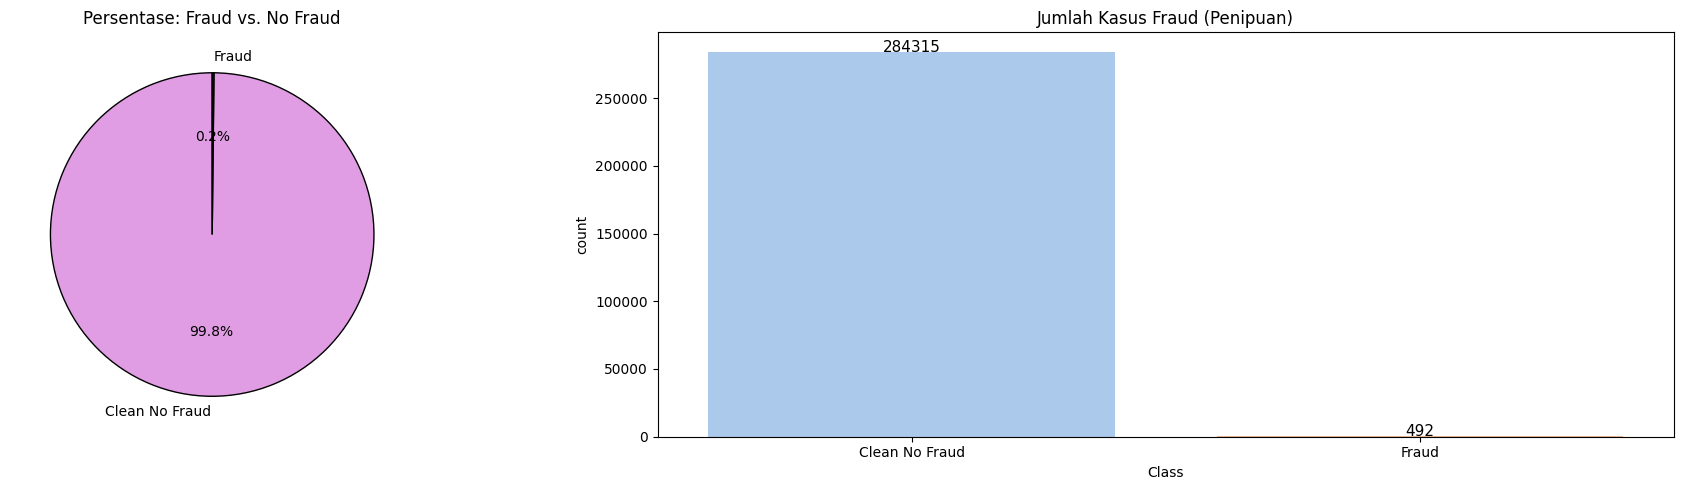

In [49]:
# Hitung persentase
fraud   = len(raw_data[raw_data['Class'] == 1]) / len(raw_data) * 100
nofraud = len(raw_data[raw_data['Class'] == 0]) / len(raw_data) * 100
# Urutan [nofraud, fraud] supaya label "Clean No Fraud" muncul lebih dulu pada pie
fraud_percentage = [nofraud, fraud]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Subplot 1: Pie chart
axes[0].pie(
    fraud_percentage,
    labels=['Clean No Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Persentase: Fraud vs. No Fraud')

# Subplot 2: Countplot dengan palette
axes[1] = sns.countplot(
    x='Class', hue='Class', data=raw_data, palette="pastel", dodge=False, legend=False, ax=axes[1])

# posisi ticks dan label 
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Clean No Fraud', 'Fraud'])
axes[1].set_title('Jumlah Kasus Fraud (Penipuan)')

# angka di atas tiap bar
for rect in axes[1].patches:
    height = rect.get_height()
    axes[1].text(
        rect.get_x() + rect.get_width() / 2, height + 2, int(height), ha='center', fontsize=11)

plt.tight_layout()
plt.show()

In [50]:
print('Clean No Fraud', round(raw_data['Class'].value_counts()[0]/len(raw_data) * 100,2), '% dari keseluruhan dataset')
print('Fraud', round(raw_data['Class'].value_counts()[1]/len(raw_data) * 100,2), '% dari keseluruhan dataset')

Clean No Fraud 99.83 % dari keseluruhan dataset
Fraud 0.17 % dari keseluruhan dataset


dapat dilihat Dataset yang diggunakan sanggat imbalance lebih dominan ke No Fraud dan dapat menyebabkan error dan overfit dikarenakan data di dominasi oleh No fraud

## **Pemilihan Fitur**

In [51]:
data = raw_data.copy()

"""data.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("-" * 100)"""

'data.drop_duplicates(inplace=True)\nprint("Duplicated values dropped succesfully")\nprint("-" * 100)'

> tidak jadi melakukan clean up data

### **Correlation Matrix**

**Correlation matrix** merupakan kunci untuk memahami data. Tujuan utamanya adalah mengidentifikasi fitur-fitur yang memiliki dampak signifikan terhadap transaksi tertentu yang merupakan Fraud(penipuan). Namun, untuk mengamati fitur-fitur mana yang memiliki korelasi positif atau negatif yang tinggi dengan transaksi Fraud(penipuan), penting untuk menggunakan dataframe yang tepat (subsample).

<Axes: >

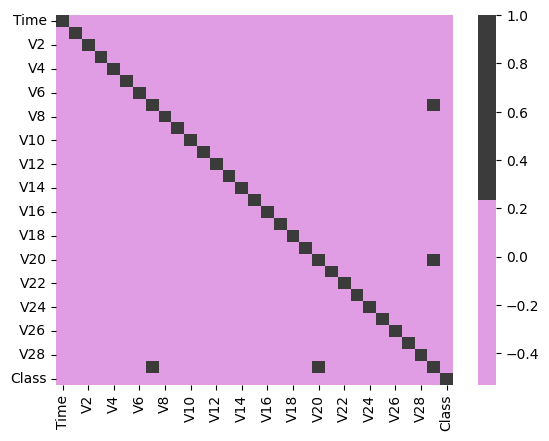

In [52]:
sns.heatmap(data.corr(),cmap = colors,cbar = True)

- Ada terlalu banyak fitur dalam dataset ini dan sulit untuk dipahami.
- Oleh karena itu, correlation map akan digambar hanya dengan variabel target saja.

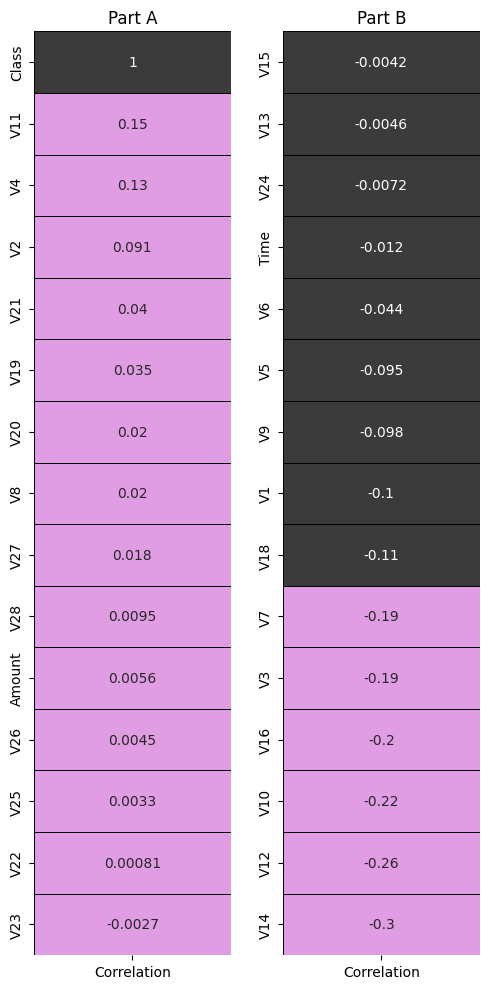

In [53]:
corr = data.corrwith(data['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))
# part A
plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part A')

# part B
plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part B')

fig.tight_layout(w_pad = 2)

Dalam pemilihan fitur, kriteria eksklusi akan diterapkan untuk menghilangkan fitur yang menunjukkan value korelasi antara [-0.1 dan 0.1].

Korelasi berikut ini telah ditetapkan: V4 dan V11 menunjukkan korelasi positif, sementara V7, V3, V16, V10, V12, V14, dan V17 menunjukkan korelasi negatif dengan fitur Class.

### **ANOVA**

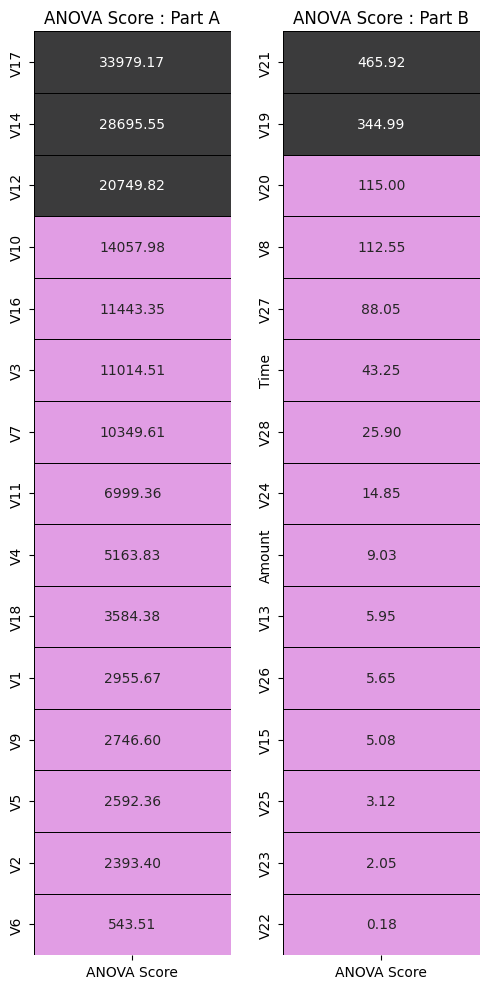

In [54]:
# feature & target 
feature = data.loc[:, :'Amount']    
target  = data.loc[:,  'Class']  

# SelectKBest
best_feature = SelectKBest(score_func=f_classif, k='all')
fit = best_feature.fit(feature, target)

# DataFrame ANOVA Score
featurescore = pd.DataFrame(
    data=fit.scores_, index=feature.columns, columns=["ANOVA Score"])
featurescore = featurescore.sort_values(by="ANOVA Score", ascending=False)

# subplot untuk menampilkan bagian (A dan B)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 10))

# Heatmap part A
sns.heatmap(
    featurescore.iloc[:15, :], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=axes[0])
axes[0].set_title('ANOVA Score : Part A')

# Heatmap part B
sns.heatmap(
    featurescore.iloc[15:30, :], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=axes[1])
axes[1].set_title('ANOVA Score : Part B')

fig.tight_layout(w_pad=2)
plt.show()

semakin tinggi Score ANOVA, semakin penting fitur tersebut terhadap variabel target.

Dari hasil nilai Score ANOVA di atas, maka fitur dengan nilai kurang dari 50 akan dibuang.

Berdasarkan hasil tersebut, maka akan dibuat 2 model berdasarkan fitur yang dipilih dari Correlation Plot & ANOVA Score.

### Modeling

#### Model Bedasarkan Correlation Plot

In [55]:
model1 = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
model1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.54,1.38,0.24,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0
1,0.17,0.45,-0.08,-0.17,1.61,1.07,-0.14,0.46,-0.11,0
2,1.77,0.38,0.79,0.21,0.62,0.07,-0.17,-2.89,1.11,0
3,1.79,-0.86,0.24,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,0
4,1.55,0.40,0.59,0.75,-0.82,0.54,-1.12,-0.45,-0.24,0


#### Model Bedasarkan ANOVA Score

In [56]:
model2 = data.copy(deep = True)
model2.drop(columns = list(featurescore.index[20:]),inplace = True)
model2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,-0.62,-0.31,-0.47,0.21,0.03,0.40,0.25,-0.02,0.13,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,1.07,-0.14,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.01,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0.52,0.25,-0.06,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,0.18,-0.29,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.06,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.54,-1.12,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.22,0


## **Data Balancing**

Untuk mengatasi **unbalanced data**, terdapat 2 opsi:

- **Undersampling:** Mengurangi jumlah sampel dominan dari variabel target.

- **Oversampling:** Meningkatkan jumlah sampel non-dominan dari variabel target hingga setara dengan sampel dominan.

Untuk kinerja terbaik, akan digunakan gabungan antara **undersampling** dan **oversampling**.

Langkah pertama adalah melakukan **undersampling** pada sampel dominan, diikuti dengan **oversampling** pada sampel non-dominan.

Untuk **data balancing**, akan digunakan **`imblearn`**.

**SMOTE**

**Synthetic Minority Over-sampling Technique** (**SMOTE**) adalah sebuah metode yang digunakan untuk mengatasi Unbalance class dalam dataset dengan cara menciptakan data baru untuk class non-dominan. Proses ini melibatkan identifikasi titik data yang berdekatan dalam ruang fitur. **SMOTE** secara efektif memperbanyak representasi class non-dominan dalam dataset tanpa duplikasi data yang ada.

#### Data Balancing untuk model Correlation

In [57]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = model1.iloc[:,:9].values
t1 = model1.iloc[:,9].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({np.int64(0): 4920, np.int64(1): 2460})

#### Data Balancing untuk model ANOVA Score

In [58]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f2 = model2.iloc[:,:20].values
t2 = model2.iloc[:,20].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(f2, t2)
Counter(t2)

Counter({np.int64(0): 4920, np.int64(1): 2460})

***Penjelasan** 

Perhitungan untuk Data Balancing :
- **Sampling Strategy**: Ini adalah rasio yang menjadi parameter umum untuk oversampling dan undersampling.
- **Sampling Strategy**: **(Jumlah Sampel Kelas non-dominan) / (Jumlah Sampel Kelas dominan)**
- Dalam kasus ini,

    - Kelas **dominan**: Tidak Ada Kasus Penipuan : 284.315 sampel
    - Kelas **non-dominan**: Kasus Penipuan : 492 sampel

Undersampling: Mengurangi jumlah sampel kelas yang dominan.
- Sampling_Strategy = 0,1
- 0,1 = (492) / Sampel Kelas dominan
- Setelah undersampling,
    - Kelas dominan: Tidak Ada Kasus Penipuan : 4.920 sampel
    - Kelas non-dominan: Kasus Penipuan : 492 sampel

Oversampling: Meningkatkan jumlah sampel kelas non-dominan
- Sampling_Strategy = 0,5
- 0,5 = (Sampel Kelas non-dominan) / 4920
- Setelah oversampling,
    - Kelas dominan: Tidak Ada Kasus Penipuan : 4920 sampel
    - Kelas non-dominan: Kasus Penipuan : 2460 sampel

- Untuk dataset yang imbalanced, data diduplikasi guna mengatasi potensi bias dalam prediksi.
- Akibat proses duplikasi ini, data sintetis diterapkan untuk tujuan pemodelan demi memastikan prediksi tidak condong ke nilai kelas target yang dominan.
- Oleh karena itu, mengevaluasi model menggunakan akurasi akan menyesatkan. Sebagai gantinya, akan digunakan confusion matrix, ROC-AUC graph, dan ROC-AUC score untuk evaluasi model.


## **Modeling**

In [59]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

- Data dibagi menjadi dua kelompok dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian.

In [60]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### 1. Logistic Regression

In [61]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

#### Model Correlation

Cross Validation Score :  98.07%
ROC_AUC Score :  93.90%


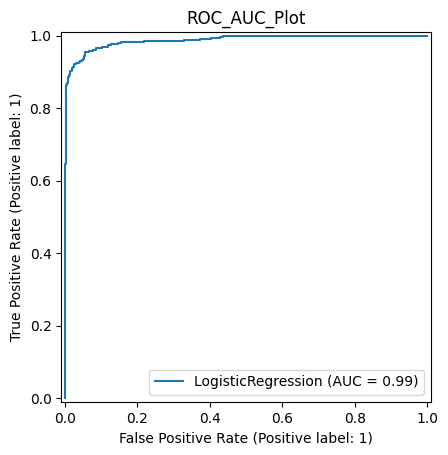

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       975
           1       0.98      0.89      0.93       501

    accuracy                           0.96      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.96      0.96      0.95      1476



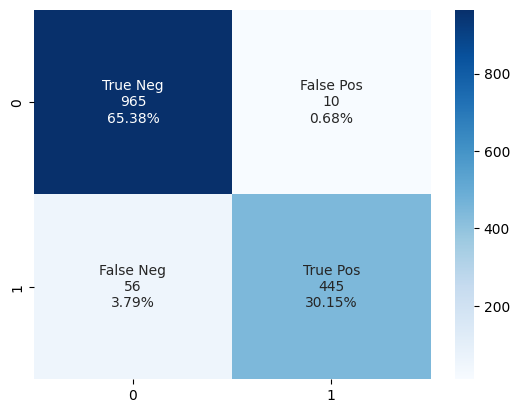

In [62]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

#### Model ANOVA Score

Cross Validation Score :  98.48%
ROC_AUC Score :  93.99%


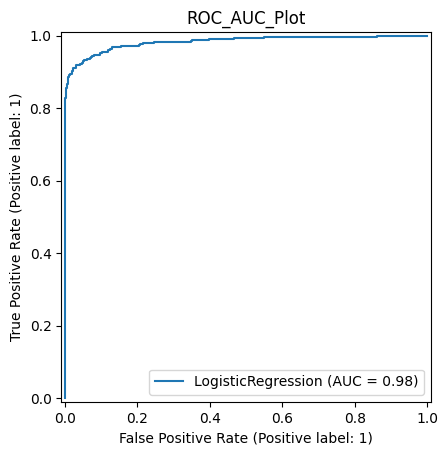

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       975
           1       0.96      0.90      0.93       501

    accuracy                           0.95      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.95      0.95      0.95      1476



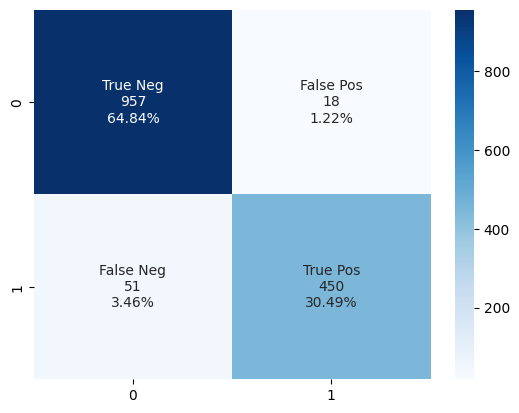

In [63]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

### 2. Support Vector Classifier

In [64]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

#### Model Correlation

Cross Validation Score :  98.02%
ROC_AUC Score :  93.45%


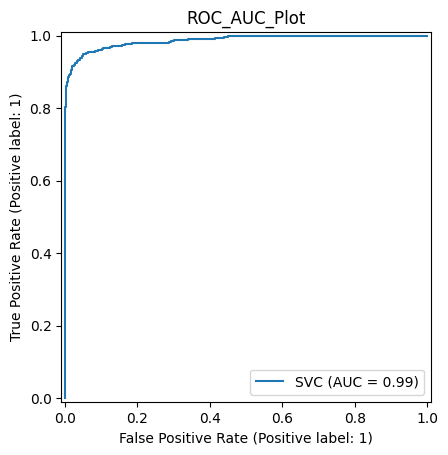

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       975
           1       0.98      0.88      0.93       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.95      1476
weighted avg       0.95      0.95      0.95      1476



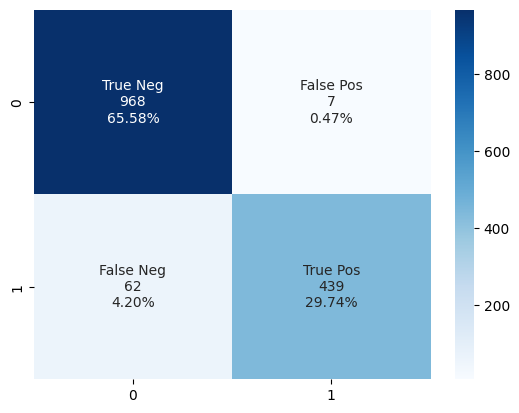

In [65]:
model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)

#### Model ANOVA Score

Cross Validation Score :  98.37%
ROC_AUC Score :  93.30%


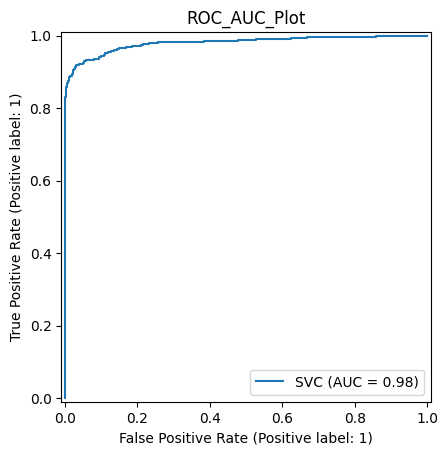

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.98      0.88      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



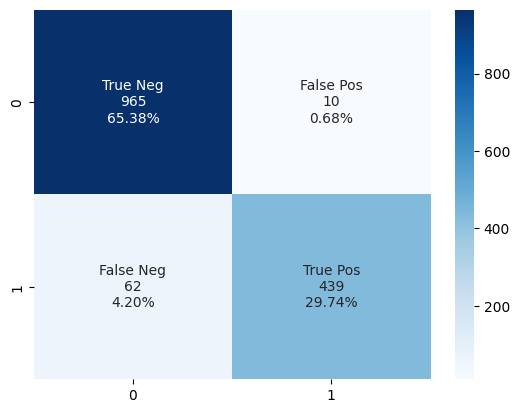

In [66]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

### 3. Decision Tree Classifier

In [67]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

#### Model Correlation

Cross Validation Score :  96.73%
ROC_AUC Score :  94.15%


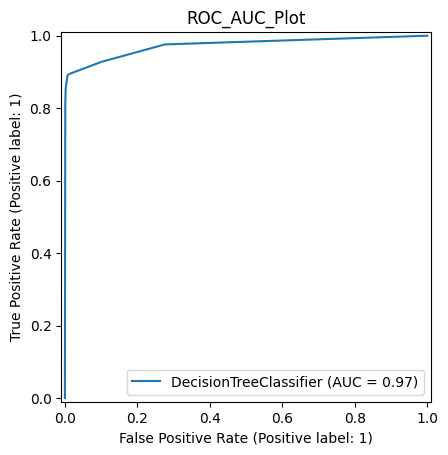

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       975
           1       0.98      0.89      0.94       501

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476



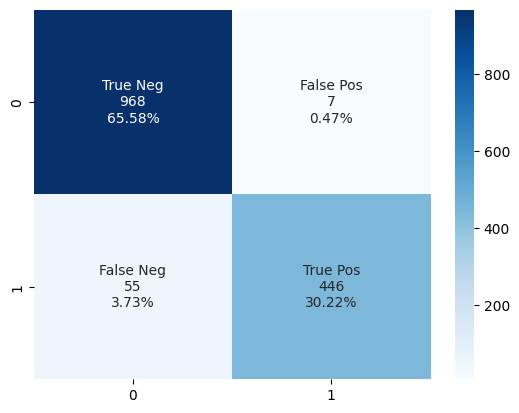

In [68]:
model(classifier_dt,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_dt,x_test1,y_test1)

#### Model ANOVA Score

Cross Validation Score :  96.76%
ROC_AUC Score :  93.73%


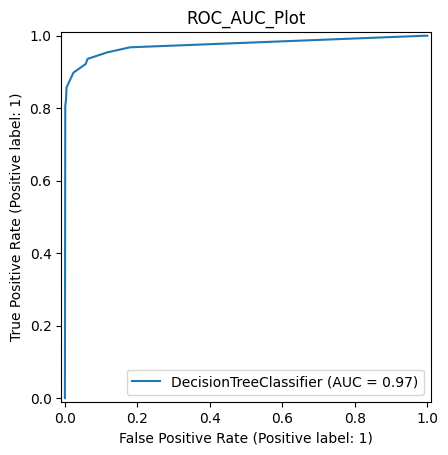

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       975
           1       0.95      0.90      0.92       501

    accuracy                           0.95      1476
   macro avg       0.95      0.94      0.94      1476
weighted avg       0.95      0.95      0.95      1476



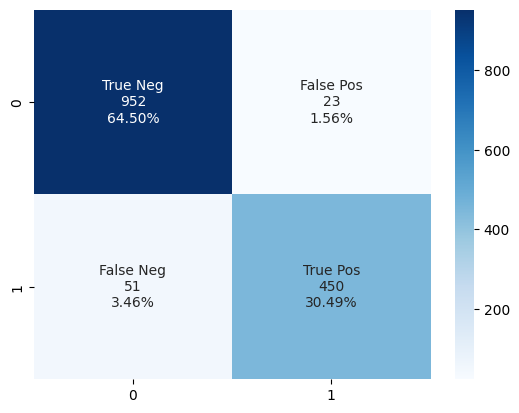

In [69]:
model(classifier_dt,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_dt,x_test2,y_test2)

### 4. Random Forest Classifier

In [70]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

#### Model Correlation

Cross Validation Score :  98.05%
ROC_AUC Score :  93.06%


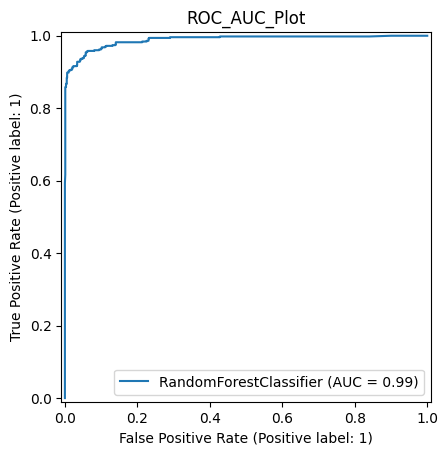

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       975
           1       0.99      0.86      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



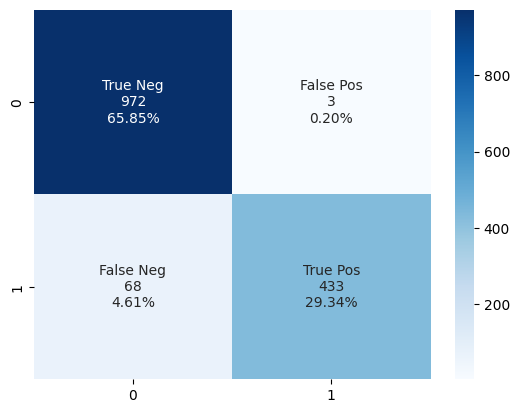

In [71]:
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rf,x_test1,y_test1)

#### Model ANOVA Score

Cross Validation Score :  98.05%
ROC_AUC Score :  92.61%


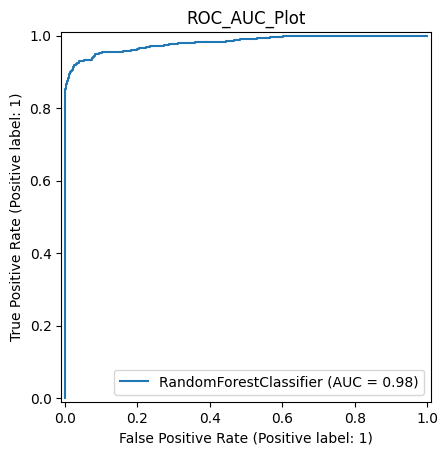

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       975
           1       1.00      0.85      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



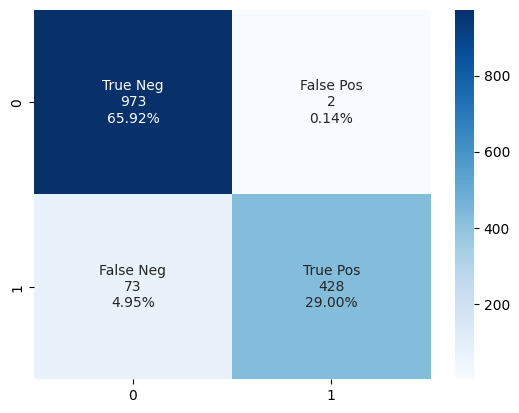

In [72]:
model(classifier_rf,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_rf,x_test2,y_test2)

### 5. K-Nearest Neighbors

In [73]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

#### Model Correlation

Cross Validation Score :  99.28%
ROC_AUC Score :  98.13%


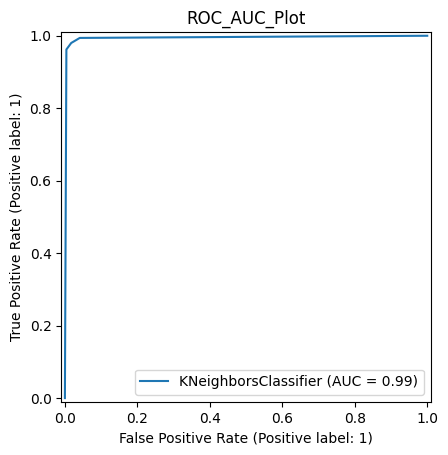

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       975
           1       0.97      0.98      0.97       501

    accuracy                           0.98      1476
   macro avg       0.98      0.98      0.98      1476
weighted avg       0.98      0.98      0.98      1476



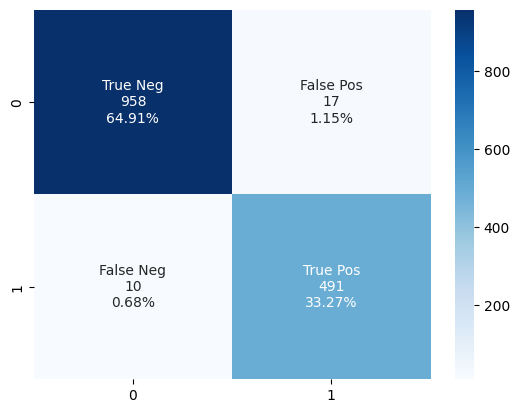

In [74]:
model(classifier_knn,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_knn,x_test1,y_test1)

#### Model ANOVA Score

Cross Validation Score :  99.52%
ROC_AUC Score :  98.83%


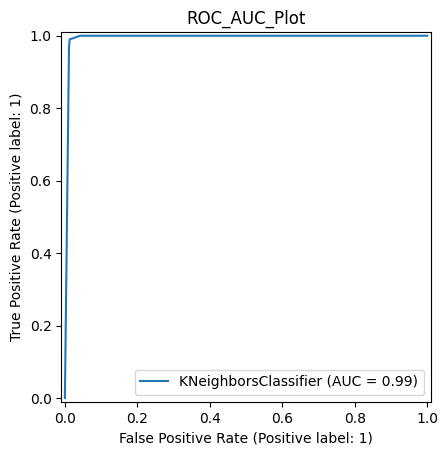

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       975
           1       0.97      0.99      0.98       501

    accuracy                           0.99      1476
   macro avg       0.98      0.99      0.99      1476
weighted avg       0.99      0.99      0.99      1476



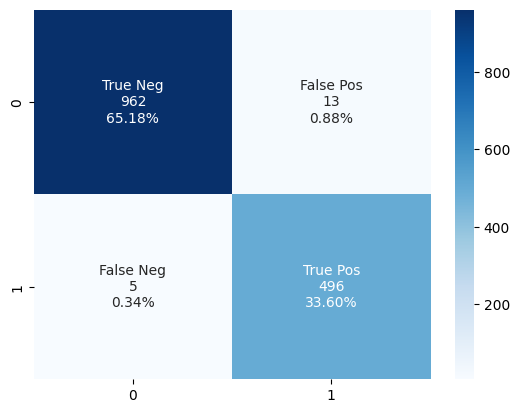

In [75]:
model(classifier_knn,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_knn,x_test2,y_test2)

In [76]:
# 1) Daftar model
models = [
    ("Logistic Regression", LogisticRegression(random_state=0, C=10, penalty='l2', max_iter=1000)),
    ("Support Vector Classifier", SVC(kernel='linear', C=0.1, probability=True)),
    ("Decision Tree Classifier", DecisionTreeClassifier(random_state=1000, max_depth=4, min_samples_leaf=1)),
    ("Random Forest Classifier", RandomForestClassifier(max_depth=4, random_state=0)),
    ("K-Nearest Neighbors", KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1))
]

# 2) Fungsi untuk evaluasi dan pengumpulan metrik
def evaluate_models(models, x_train, y_train, x_test, y_test):
    records = []
    for idx, (name, clf) in enumerate(models, start=1):
        clf.fit(x_train, y_train)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        cv_score = cross_val_score(clf, x_train, y_train, cv=cv, scoring='roc_auc').mean()
        y_pred = clf.predict(x_test)
        roc_auc = roc_auc_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        records.append({
            "No.": idx,
            "ML Algorithm": name,
            "Cross Validation ROC AUC": f"{cv_score:.2%}",
            "Test ROC AUC": f"{roc_auc:.2%}",
            "F1 Score (Fraud)": f"{f1:.2%}"
        })
    return pd.DataFrame(records)

# 3) Evaluasi untuk fitur Correlation Plot
results_corr = evaluate_models(models, x_train1, y_train1, x_test1, y_test1)
print("### Table Hasil: Correlation Plot ###")
display(results_corr)

# 4) Evaluasi untuk fitur ANOVA Score
results_anova = evaluate_models(models, x_train2, y_train2, x_test2, y_test2)
print("\n### Table Hasil: ANOVA Score ###")
display(results_anova)

### Table Hasil: Correlation Plot ###


,No.,ML Algorithm,Cross Validation ROC AUC,Test ROC AUC,F1 Score (Fraud)
0,1,Logistic Regression,98.07%,93.90%,93.10%
1,2,Support Vector Classifier,98.02%,93.45%,92.71%
2,3,Decision Tree Classifier,96.73%,94.15%,93.50%
3,4,Random Forest Classifier,98.05%,93.06%,92.42%
4,5,K-Nearest Neighbors,99.28%,98.13%,97.32%



### Table Hasil: ANOVA Score ###


,No.,ML Algorithm,Cross Validation ROC AUC,Test ROC AUC,F1 Score (Fraud)
0,1,Logistic Regression,98.48%,93.99%,92.88%
1,2,Support Vector Classifier,98.37%,93.30%,92.42%
2,3,Decision Tree Classifier,96.76%,93.73%,92.40%
3,4,Random Forest Classifier,98.05%,92.61%,91.94%
4,5,K-Nearest Neighbors,99.52%,98.83%,98.22%


## **Referensi** 
1.  Bachmann, J. (2018). *Credit Fraud: Dealing with Imbalanced Datasets* [Notebook]. Kaggle. https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook
2.  Rutecki, M. (2018). *SMOTE and Tomek Links for Imbalanced Data* [Notebook]. Kaggle. https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data/notebook
3.  Kabure. (2018). *Credit Card Fraud Prediction: RF & SMOTE* [Notebook]. Kaggle. https://www.kaggle.com/code/kabure/credit-card-fraud-prediction-rf-smote